In [3]:
!pip install scikit-image

    100% |████████████████████████████████| 35.5MB 43kB/s  eta 0:00:01
    100% |████████████████████████████████| 5.7MB 281kB/s eta 0:00:01
    100% |████████████████████████████████| 12.5MB 141kB/s eta 0:00:01
    100% |████████████████████████████████| 49.6MB 30kB/s  eta 0:00:01
    100% |████████████████████████████████| 5.9MB 300kB/s eta 0:00:01
    100% |████████████████████████████████| 1.6MB 995kB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 4.1MB/s eta 0:00:01
    100% |████████████████████████████████| 952kB 1.4MB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 2.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/sai_win_upmc/.cache/pip/wheels/a0/33/4e/7c9228ea77f8090e895d8d2b76f3b5a76997a5b3edeb4e2c6f
Successfully built networkx


/mnt/c/Users/pandiselvarajs/Documents/git/neural-art/venv1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


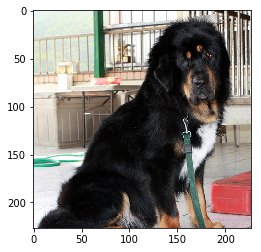

0.8019623756408691
('Top1: ', 'n02108551 Tibetan mastiff', 0.9949439) 244
('Top5: ', [('n02108551 Tibetan mastiff', 0.9949439), ('n02101006 Gordon setter', 0.0018765604), ('n02111277 Newfoundland, Newfoundland dog', 0.0013795516), ('n02107683 Bernese mountain dog', 0.00080173014), ('n02097474 Tibetan terrier, chrysanthemum dog', 0.0002549953)])


In [6]:
import numpy as np
import time
from alexnet import build_alexnet, print_prob, load_process_image
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

im_path = "data/dog.png"
PIX_MEAN = [103.939, 116.779, 123.68]
im0, im1 = load_process_image(im_path, PIX_MEAN)
plt.imshow(im0.astype(np.uint8))
plt.show()
# Load net from https://www.cs.toronto.edu/~guerzhoy/tf_alexnet/
net_data = np.load(open("model/bvlc_alexnet.npy", "rb"),\
                   encoding="latin1").item()

# Build Netword 
xdim = (227,227,3)
ydim = 1000
x = tf.placeholder(tf.float32, (None,) + xdim)
alexnet = build_alexnet(x, net_data)
dirpath = 'logs_grad'

# Find prob
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
summary_writer = tf.summary.FileWriter(dirpath, graph=sess.graph)
t = time.time()
output = sess.run(alexnet, feed_dict = {x:[im1]})
print(time.time()-t)
pred_id = print_prob(output[0,:], './synset.txt')
sess.close()

0.9949439


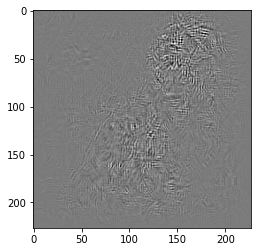

In [7]:
sess = tf.Session()
sess.run(init)

# Get Tensors of softmax and input
output = sess.graph.get_operation_by_name('Softmax')
inp = sess.graph.get_tensor_by_name('Placeholder:0')

# get prob for im1
sf = tf.slice(output.outputs[0], [0,pred_id], [1,1])
sf = tf.reduce_sum(sf)
gradgd = tf.gradients(ys=sf, xs=inp)

s, grad_gd = sess.run([sf, gradgd], feed_dict= {x:[im1]})
print(s)
sess.close()

im_grad = grad_gd[0][0,:,:,:]
im_grad = np.sum(im_grad, axis=2)
im_grad = im_grad - im_grad.min()
im_grad = im_grad/im_grad.max()

plt.imshow(im_grad, cmap='gray')
plt.show()

```
# [v for v in tf.trainable_variables()]
# for op in sess.graph.get_operations():
# sess.graph.get_operation_by_name('Softmax')
# inp = sess.graph.get_tensor_by_name('Placeholder:0')
# [n.name for n in tf.get_default_graph().as_graph_def().node]
```